In [54]:
import math
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

**Задание 1. Моделирование отсчётов случайного процесса.**

Объявление параметров модели.

In [55]:
D = 5
alpha = 0.1
n = 150

Заданная ковариационная функция R(t).

In [56]:
def R(t):
    return D * math.exp(- alpha * abs(t))

Моделирование отсчётов случайного процесса по готовой формуле, полученной с помощью метода авторегрессии - скользящего среднего (ARMA).

In [57]:
def gen_x():
    np.random.seed(2023)
    
    x = np.random.normal(0, 1, n)
    a0 = math.sqrt(D * (1 - math.exp(- 2 * alpha)))
    b1 = math.exp(- alpha)

    res = [0.] * n
    res[0] = a0 * x[0]
    for j in range(1, n):
        res[j] = a0 * x[j] + b1 * res[j - 1]

    return res

In [58]:
X = gen_x()

**Задание 2. Графическое представление отсчётов.**

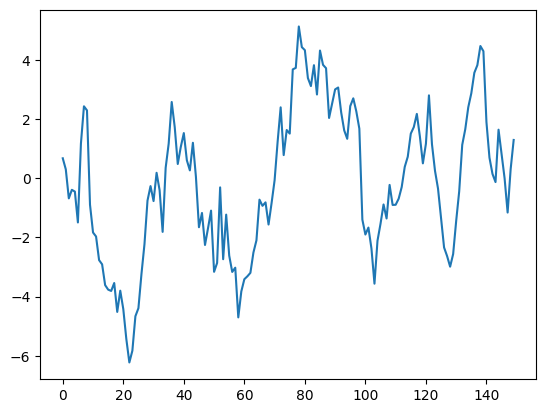

In [59]:
plt.plot(X)
plt.show()

**Задание 3. Статистический анализ данных.**

Описательные статистики для временного ряда X:

In [60]:
S = pd.Series(X)
S.describe()

count    150.000000
mean      -0.167109
std        2.487432
min       -6.228947
25%       -1.951375
50%       -0.243290
75%        1.641934
max        5.135612
dtype: float64

Гистограмма для временного ряда X:

<Axes: >

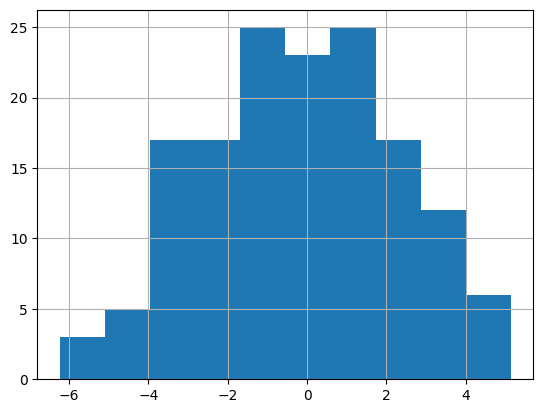

In [61]:
S.hist()

Проверка временного ряда X на нормальность распределения:

In [62]:
stat, p = sp.stats.normaltest(X) # Критерий согласия Пирсона
print('Statistics = %.3f, p-value = %.3f' % (stat, p))
stat_sign = 0.05
if p > stat_sign:
    print('Гипотеза о нормальности принимается.')
else:
    print('Гипотеза о нормальности отклоняется.')

Statistics = 5.164, p-value = 0.076
Гипотеза о нормальности принимается.


Тренд-анализ временного ряда X:

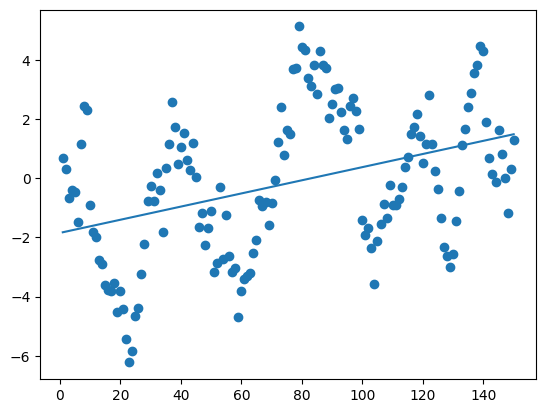

In [63]:
Y = range(1,151)
plt.scatter(Y, X)
Z = np.polyfit(Y,X,1)
p = np.poly1d(Z)
plt.plot(Y, p(Y))

Вывод:

Из результата вывода описательных статистик видно, что математическое ожидание ряда близко к 0, что соответствует действительности, мы моделировали ряд с нулевым мат. ожиданием. Параметр D в ковариационной функции - это дисперсия. Выборочное стандартное отклонение должно соответствовать √D. Значения получается довольно близкие, как и должно быть.
Из гистограммы и графика отсчётов видно, что правило трёх сигма выполняется. Также из гистограммы можно судить, что данные имеют нормальное распределение, т.к. график гистограммы напоминает график плотности нормального распределения. Это подтверждается проверкой гипотезы о нормальности данных, гипотеза выполняется, т.е. данные имеют нормально распределение (с уровнем значимости 0.05).
Тренд возрастающий, наблюдается положительная динамика среди значений ряда. Тренд примерно соответствует данным, но отклонение от линии довольно большое (соответсвует дисперсии).

**Задание 4. Вычисление оценки ковариационной функции.**

In [64]:
def R_est(in_h):
    res = 0
    
    m = S.mean()
    for s in range(1, (n - in_h) + 1):
        res += (X[s + in_h - 1] - m) * (X[s - 1] - m)
    
    return res / (n - in_h)

**Задание 5. Представление графика ковариационной функции и её оценки.**

In [65]:
length = int(((2 * n) / 3) + 1)

h = range(0, length)
r = [0.] * length
r_est = [0.] * length

for i in range(length):
    r[i] = R(h[i])
    r_est[i] = R_est(h[i])

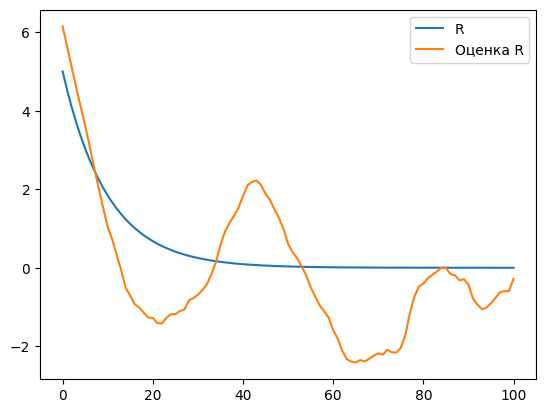

In [66]:
plt.plot(h, r, label = 'R')
plt.plot(h, r_est, label = 'Оценка R')
plt.legend()
plt.show()